<a href="https://colab.research.google.com/github/IVIo3e/Fundamental-concepts-of-AI/blob/main/Topic_2_Visual_data_analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic 2. Visual data analysis in Python

https://www.kaggle.com/mylesoneill/game-of-thrones

In [13]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [57]:
df = pd.read_csv("avocado.csv")
df = df.drop(columns=["Unnamed: 0"])

In [64]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,XLarge from total
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0.0


In [65]:
prs_xlarge_bags = (
    df["Small Bags"]  / 
    (df["XLarge Bags"] 
     + df["Small Bags"] 
     + df["Large Bags"])
)

df.insert(loc=len(df.columns), column="Small from total", value=prs_xlarge_bags)

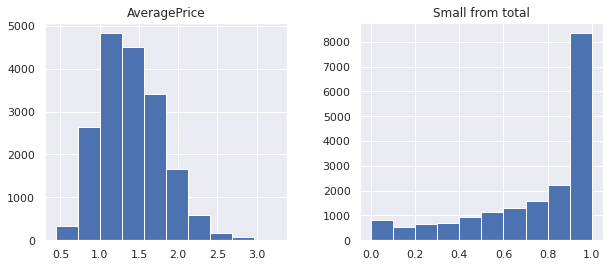

In [66]:
features = ["AveragePrice", "Small from total"]
df[features].hist(figsize=(10, 4));

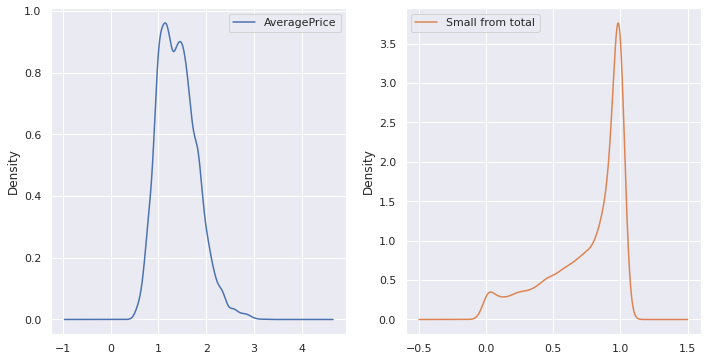

In [67]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 3), sharex=False, figsize=(18, 6)
);

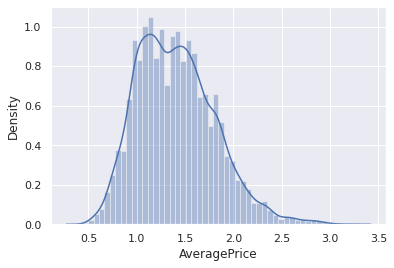

In [68]:
sns.distplot(df["AveragePrice"]);

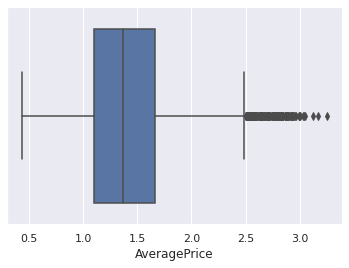

In [69]:
sns.boxplot(x="AveragePrice", data=df);

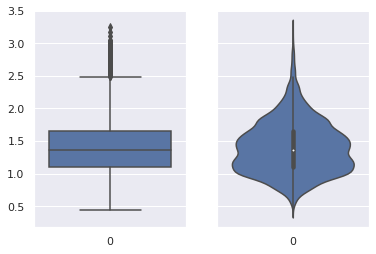

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["AveragePrice"], ax=axes[0])
sns.violinplot(data=df["AveragePrice"], ax=axes[1]);

In [71]:
df[features].describe()

,AveragePrice,Small from total
count,18249.000000,18234.000000
mean,1.405978,0.749935
std,0.402677,0.284980
min,0.440000,0.000000
25%,1.100000,0.583634
50%,1.370000,0.871755
75%,1.660000,0.987299
max,3.250000,1.000000


In [72]:
df["year"].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

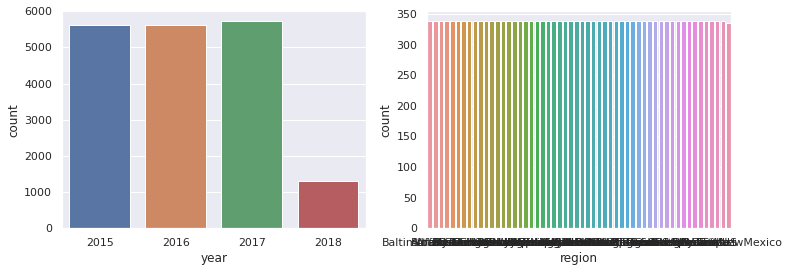

In [79]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="year", data=df, ax=axes[0])
sns.countplot(x="region", data=df, ax=axes[1]);

In [80]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'XLarge from total', 'Small from total'],
      dtype='object')

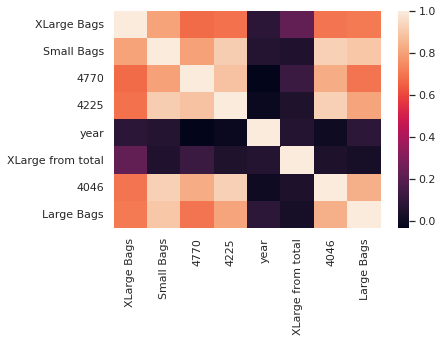

In [81]:
numerical = list(
    set(df.columns)
    - {
        "Date",
        "AveragePrice",
        "Total Volume",
        "region",
        "Total Bags",
        "Small from total",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

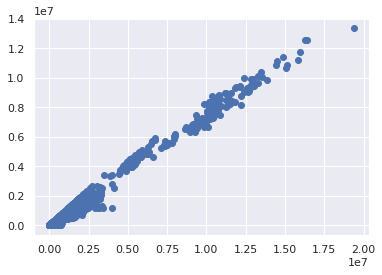

In [82]:
plt.scatter(df["Total Bags"], df["Small Bags"]);

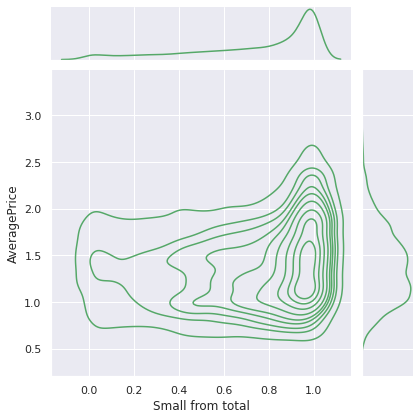

In [86]:
sns.jointplot(
    "Small from total", "AveragePrice", data=df, kind="kde", color="g"
);

In [ ]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [87]:
%config InlineBackend.figure_format = 'retina'

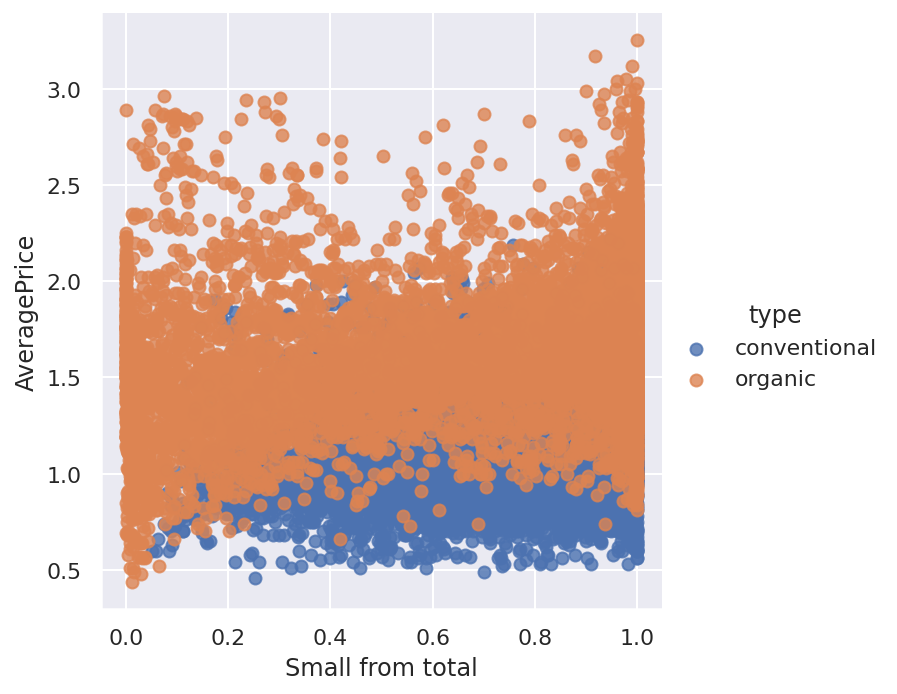

In [89]:
sns.lmplot(
    "Small from total", "AveragePrice", data=df, hue="type", fit_reg=False
);

In [ ]:
numerical = numerical = list(
    set(df.columns)
    - {
        "AveragePrice",
        "Total Volume",
        "Total Bags",
        "Small from total",
    }
)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Small Bags", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

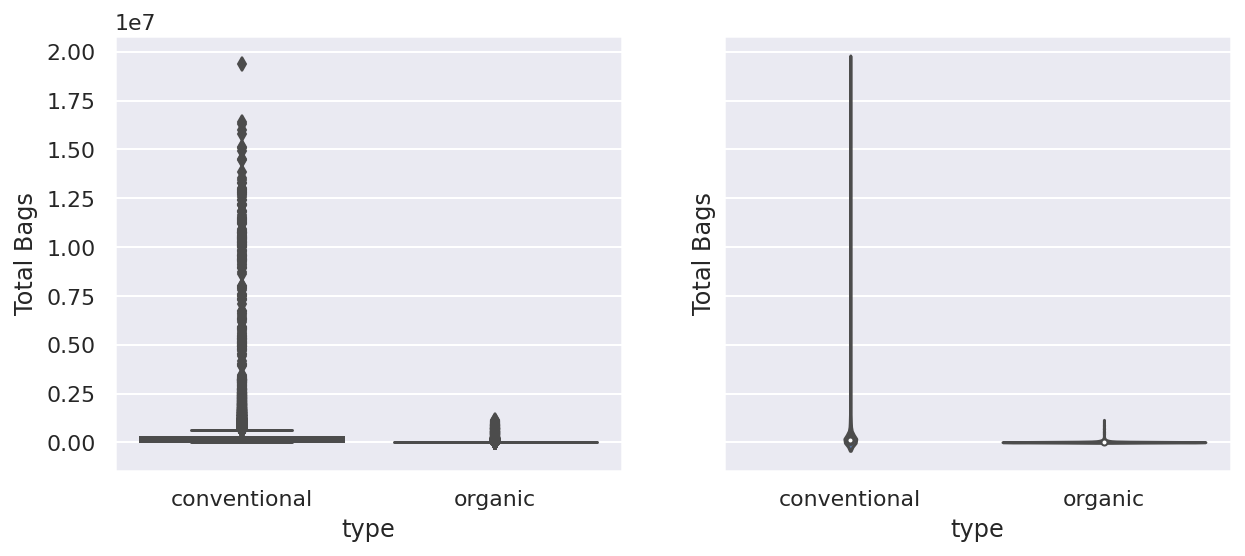

In [96]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="type", y="Total Bags", data=df, ax=axes[0])
sns.violinplot(x="type", y="Total Bags", data=df, ax=axes[1]);

In [ ]:
sns.catplot(
    x="type",
    y="Total Bags",
    col="Small Bags",
    data=df[df["XLarge Bags"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

In [ ]:
sns.countplot(x="Small from total", hue="region", data=df);

In [102]:
df.groupby(["region"])["AveragePrice"].agg([np.mean]).sort_values(by="mean", ascending=False).T

region,HartfordSpringfield,SanFrancisco,NewYork,Philadelphia,Sacramento,Charlotte,Northeast,Albany,Chicago,RaleighGreensboro,BaltimoreWashington,Boston,Syracuse,BuffaloRochester,HarrisburgScranton,Jacksonville,Orlando,GrandRapids,NorthernNewEngland,Spokane,Seattle,Plains,StLouis,MiamiFtLauderdale,Tampa,Midsouth,SouthCarolina,SanDiego,Southeast,California,LasVegas,Pittsburgh,Boise,GreatLakes,Atlanta,TotalUS,Portland,Indianapolis,NewOrleansMobile,RichmondNorfolk,Louisville,Detroit,West,WestTexNewMexico,Columbus,Roanoke,PhoenixTucson,Denver,LosAngeles,Nashville,CincinnatiDayton,SouthCentral,DallasFtWorth,Houston
mean,1.818639,1.804201,1.727574,1.63213,1.621568,1.606036,1.601923,1.561036,1.556775,1.555118,1.534231,1.530888,1.520325,1.516834,1.513284,1.510947,1.506213,1.505,1.477396,1.445592,1.442574,1.436509,1.430621,1.428491,1.408846,1.404763,1.403284,1.398166,1.398018,1.395325,1.380917,1.36432,1.348136,1.33855,1.337959,1.319024,1.317722,1.313994,1.304793,1.291331,1.286686,1.276095,1.272219,1.261701,1.252781,1.247929,1.224438,1.21858,1.216006,1.212101,1.209201,1.101243,1.085592,1.047929


In [103]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [107]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'XLarge from total', 'Small from total'],
      dtype='object')

In [114]:
X = df.drop(["Date", "region"], axis=1)
X["type"] = X["type"].map({"conventional": 1, "organic": 0})
X = X.fillna(value=0)

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:5000])

In [126]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

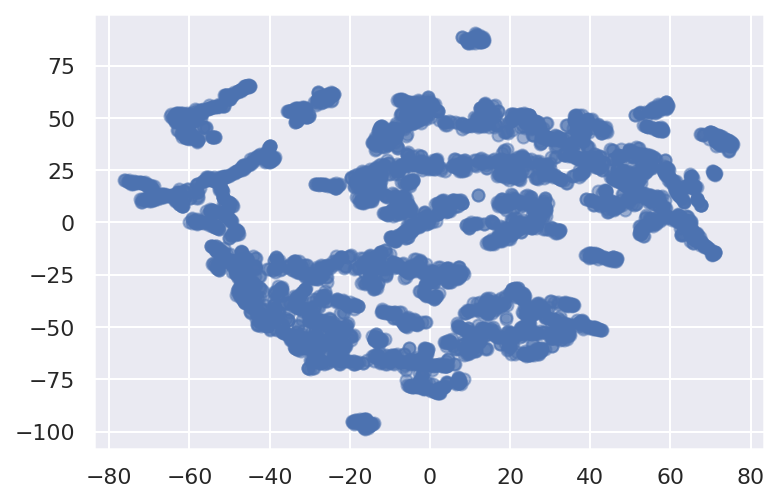

In [127]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["type"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name][:5000].map({1: "orange", 0: "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);